In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np		
from scipy import integrate

# show plots in notebook
%matplotlib inline

# define system in terms of separated differential equations
A=0.001;
B=0.01;
C=0.01;
D=0.1;
E=1.00;
F=0.1;

def f(x,y,z):
    return A*x*y - B*x
def g(x,y,z):
    return C*y*z - D*x*y
def h(x,y,z):
    return E*z - F*y*z

# initialize lists containing values
x = []
y = []
z = []

#iv1, iv2 = initial values, dt = timestep, time = range

# define a template for our function or system called “sys”
def sys(iv1, iv2, iv3, dt, time):
    # initial values:
    x.append(iv1)
    y.append(iv2)
    z.append(iv3)
    # compute and fill lists
    for i in range(time):
        x.append(x[i] + (f(x[i],y[i],z[i])) * dt)
        y.append(y[i] + (g(x[i],y[i],z[i])) * dt)
        z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return x, y, z

# Call sys function with initial values
sys(10, 10, 30, 0.01, 1000);

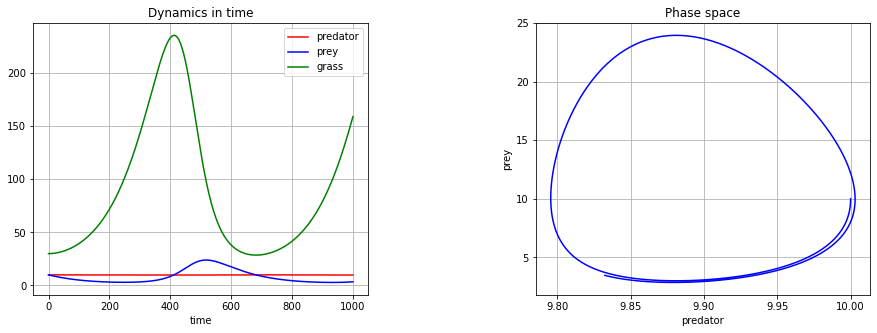

In [2]:
#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='predator')
ax1.plot(y, 'b-', label='prey')
ax1.plot(z, 'g-', label='grass')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("predator")
ax2.set_ylabel("prey")  
ax2.set_title("Phase space")
ax2.grid()

#saving for latter
XPhase=x;
YPhase=y;
ZPhase=z;

In [3]:
# brute force: iterate through possibility space (r)
fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            for z in range(r):
                if ((f(x,y,z) == 0) and (g(x,y,z) == 0) and (h(x,y,z) == 0)):
                    fp.append((x,y,z))
                    print('The system has a fixed point in %s,%s,%s' % (x,y,z))
    return fp(x,y,z)

find_fixed_points(10)

The system has a fixed point in 0,0,0
The system has a fixed point in 0,1,0
The system has a fixed point in 0,2,0
The system has a fixed point in 0,3,0
The system has a fixed point in 0,4,0
The system has a fixed point in 0,5,0
The system has a fixed point in 0,6,0
The system has a fixed point in 0,7,0
The system has a fixed point in 0,8,0
The system has a fixed point in 0,9,0


TypeError: 'list' object is not callable

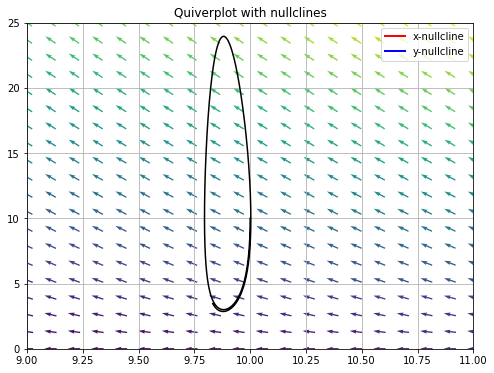

In [4]:
# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ 2*X[0] - X[0]**2 - X[0]*X[1] , - X[1] + X[0]*X[1] ])

#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(0,2,20)
y = np.arange(0,2,20)

# plot nullclines
ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline')
ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot with nullclines")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(9, 11, 20)
y = np.linspace(0, 25, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()
ax4.plot(XPhase, YPhase, color="black")
ax4.axes.set_xlim ( [9,11]);
ax4.axes.set_ylim ( [0,25]);
